# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

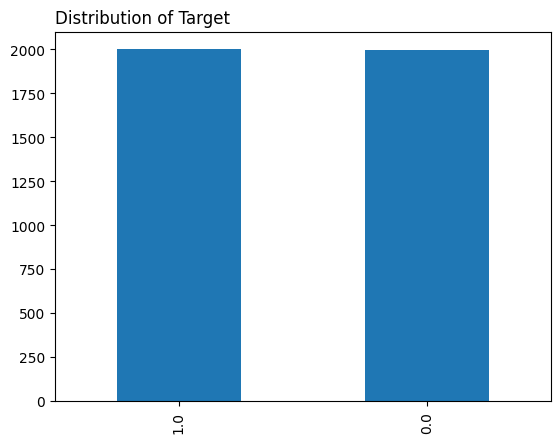

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [35]:
# Insert Code
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = list(X_train.select_dtypes(include=['float64','int64']).columns)
cat_cols = list(X_train.select_dtypes(include=['object']).columns)

num_preprocessing = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_preprocessing = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_preprocessing, num_cols),
        ('cat', cat_preprocessing, cat_cols)
    ])

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


# Elbow plot

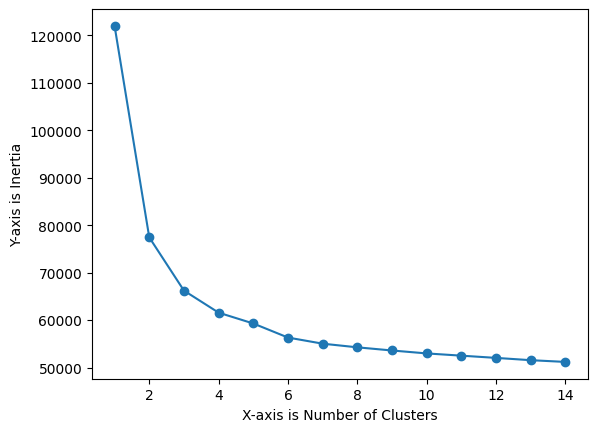

In [30]:
from sklearn.cluster import KMeans

distort_clust = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_train)
    distort_clust.append(km.inertia_)
    
plt.plot(range(1, 15), distort_clust, marker='o')
plt.xlabel('X-axis is Number of Clusters')
plt.ylabel('Y-axis is Inertia')
plt.show()


# Silhouette Plot


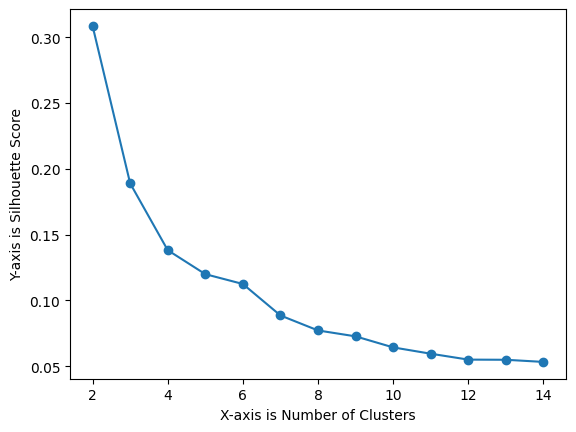

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouettes_clust = list()

for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_train)
    s = silhouette_score(X_train, km.labels_)
    silhouettes_clust.append(s)
    
plt.plot(range(2,15), silhouettes_clust, marker='o')
plt.xlabel('X-axis is Number of Clusters')
plt.ylabel('Y-axis is Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


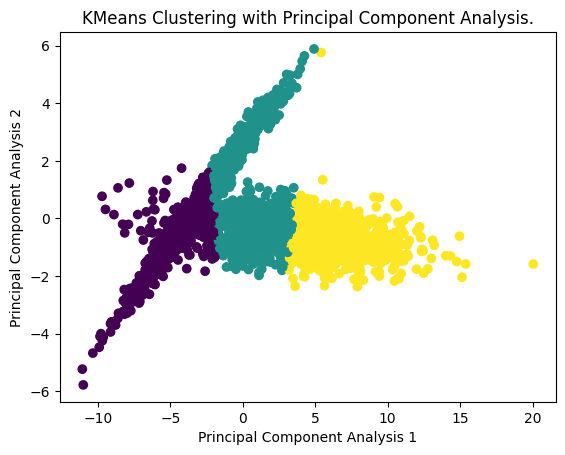

In [32]:
from sklearn.decomposition import PCA
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42)
k_means.fit(X_train)

# Visualization - Principal Component Analysis.
pca = PCA(n_components=2)
X_train_k_pca = pca.fit_transform(X_train)
plt.scatter(X_train_k_pca[:, 0], X_train_k_pca[:, 1], c=k_means.labels_)
plt.xlabel('Principal Component Analysis 1')
plt.ylabel('Principal Component Analysis 2')
plt.title('KMeans Clustering with Principal Component Analysis.')
plt.show()

The visualization shows that the k-means algorithm was able to separate the data into three distinct clusters, with minimal overlap between the clusters.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

Accuracy: 0.934
Precision: 0.992
Recall: 0.877


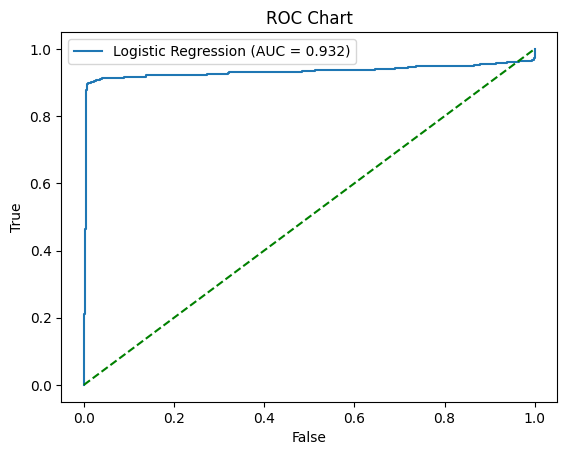

In [46]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc,precision_score, recall_score

cat_pipeline = Pipeline(steps = [('onehotencoder',  OneHotEncoder(handle_unknown = 'ignore',drop = 'first'))])
num_pipeline = Pipeline(steps = [('scaler',  StandardScaler())])

preprocessor = ColumnTransformer(transformers = [('num', num_pipeline,num_cols),('cat',cat_pipeline, cat_cols)])

pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', LogisticRegression())])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


p = {
    'regressor__penalty' : ['l2'], 
    'regressor__C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'regressor__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
from sklearn.model_selection import GridSearchCV
gcv_res = GridSearchCV(estimator= pipeline, param_grid=p, scoring='accuracy', cv=10)
gcv_res = gcv_res.fit(X_train, y_train)
Y_pred_gcv = gcv_res.predict(X_test)

accuracy = accuracy_score(y_test, Y_pred_gcv)
precision = precision_score(y_test, Y_pred_gcv)
recall = recall_score(y_test, Y_pred_gcv)
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))



y_prob = gcv_res.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

#ROC chart
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC Chart')
plt.legend()
plt.show()

Overall, the model's performance is good but not flawless, in my opinion. There is definitely opportunity for improvement, especially if we can find more characteristics that predict the target variable.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

Accuracy: 0.93
Precision: 0.99
Recall: 0.87


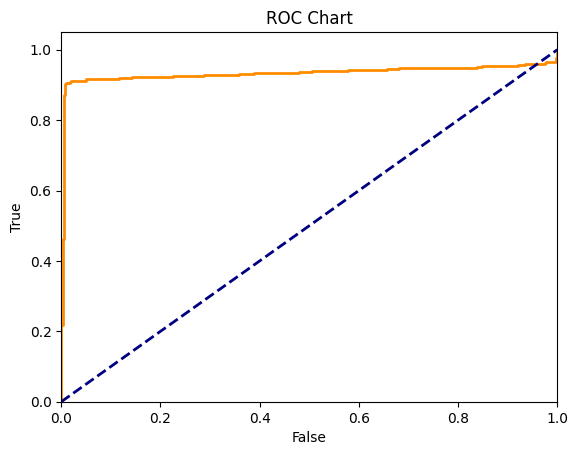

In [49]:
# Insert code
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

p = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('model', LogisticRegression(random_state=40))
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=p, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_pca_components = grid_search.best_params_['pca__n_components']
best_C = grid_search.best_params_['model__C']

p.set_params(pca__n_components=best_pca_components, model__C=best_C)
p.fit(X_train, y_train)

y_pred = p.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

y_score = p.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC Chart')
plt.show()


# References: 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

The performance parameters are raised after doing PCA, but the ROC curve area stays the same.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Accuracy: 0.95
Precision: 0.99
Recall: 0.91
ROC AUC: 0.98


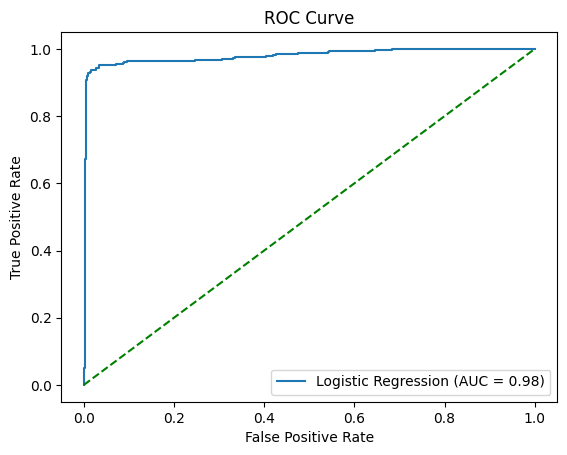

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

p = Pipeline([
    ('preprocessor', preprocessor),
    ('sc', StandardScaler()),
    ('kmeans', KMeans()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'kmeans__n_clusters': [50, 100, 150],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(p, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


best_kmeans_clusters = grid_search.best_params_['kmeans__n_clusters']
best_logreg_C = grid_search.best_params_['logreg__C']

p.set_params(kmeans__n_clusters=best_kmeans_clusters, logreg__C=best_logreg_C)
p.fit(X_train, y_train)

y_pred = p.predict(X_test)
y_proba = p.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('ROC AUC: {:.2f}'.format(roc_auc))

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC Curve')
plt.legend()
plt.show()


# References:
https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html


The Performance metrics are followed by Accuracy: 0.95
Precision: 0.99
Recall: 0.91

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

But out of all the models created for Questions 2-4, I'd suggest using the logistic regression model that has a pipeline step and uses kmeans as a preprocessor, which is completed for Question 4. Among the three tested models, this one provided the highest accuracy, precision, and recall scores as well as the highest AUC value.